<a href="https://colab.research.google.com/github/KevintheChris/My_Datascience_repository/blob/main/Analisando_os_Dados_do_Airbnb_Lisboa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 4.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Lisboa*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Lisboa, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados
Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Lisbon (good for visualisations).*

Importante: O portal está em constante evolução, os dados que usamos nessa análise são do dia 18 de março de 2024   e em determinado momento, pode ser que o [conjunto de dados](http://data.insideairbnb.com/portugal/lisbon/lisbon/2023-12-17/visualisations/listings.csv) exato utilizado nesse notebook não esteja mais disponível, o que quebraria nosso código.

Com isso em mente, vamos ao projeto.

In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('https://data.insideairbnb.com/portugal/lisbon/lisbon/2024-03-18/visualisations/listings.csv')

## Análise dos Dados


**Dicionário das variáveis**

* `id` - número de id utilizado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (*host*) da propriedade
* `host_name` - Nome do anfitrião(*host*)
* `neighbourhood_group` - qual grupo o imóvel pertecence
* `neighbourhood` - nome do bairro onde está localizado o imóvel
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias
* `number_of_reviews_ltm`- números de reviews nos últimos meses
* `license` - código de licensa no airbnb

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,935509480248268779,RC pascoal Q3,236955701,Vagner,Lisboa,Arroios,38.731989,-9.138308,Private room,30.0,1,9,2023-12-25,1.14,31,61,9,115251/AL
1,1033186766563842755,"Twin room city center, tourists spot, city centre",185898036,Flavio,Lisboa,Arroios,38.727730,-9.142410,Private room,32.0,1,5,2024-02-26,1.44,110,3,5,Exempt
2,955103410770875754,Central Lisbon Stylish Apartment,531095694,Luís,Lisboa,Estrela,38.708280,-9.170880,Entire home/apt,75.0,3,11,2024-01-12,1.54,1,266,11,123417/AL
3,790314265525149124,Quarto iluminado com varanda,453929593,Mariana,Lisboa,Arroios,38.727254,-9.136234,Private room,37.0,1,50,2024-03-15,3.68,7,346,43,112845/AL
4,28040202,Páteo Saudade Rooms,32743314,Heleno & Silva,Lisboa,Arroios,38.729560,-9.134470,Private room,40.0,2,14,2019-09-28,0.21,15,76,0,82000/AL


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**
Vamos dar continuidade e ver a quantidade de entradas que nosso dataset possui e ver os tipos de cada coluna.
Este *dataset* que baixamos é uma versão "menor" e conta com "apenas" 22929 entradas e 18 variáveis.

In [ ]:
# identificar o volume de dados do DataFrame
print('Entradas:\t {}'.format(df.shape[0]))
print('Variáveis:\t {}'.format(df.shape[1]))
# verificar as 5 primeiras entradas do dataset
print(df.dtypes)

Entradas:	 22929
Variáveis:	 18
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**
Se estamos lidando com dados do mundo real, podemos ter certeza que iremos nos deparar com valores ausentes. É importante saber logo de início se esse valor é significativo comparado ao tamanho do nosso dataset.

* Notamos que as colunas reviews_per_month e last_reviewsão as que mais possuem valores ausentes, com cerca de 14,5% de seus valores ausentes.
* A variável price chega a 12% de seu valor ausente.
* A variável license tem cerca de 5% de seu valor ausente.


In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)

last_review                       14.557983
reviews_per_month                 14.557983
price                             12.647739
license                            5.874657
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
name                               0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
host_name                          0.000000
host_id                            0.000000
calculated_host_listings_count     0.000000
availability_365                   0.000000
number_of_reviews_ltm              0.000000
id                                 0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?**
Quando se quer ter uma noção de quantas vezes uma determinada informação aparece no conjunto de dados, usar um histograma pode ser de grande valor.
Para identificar a distribuição das variáveis, irei plotar o histograma.

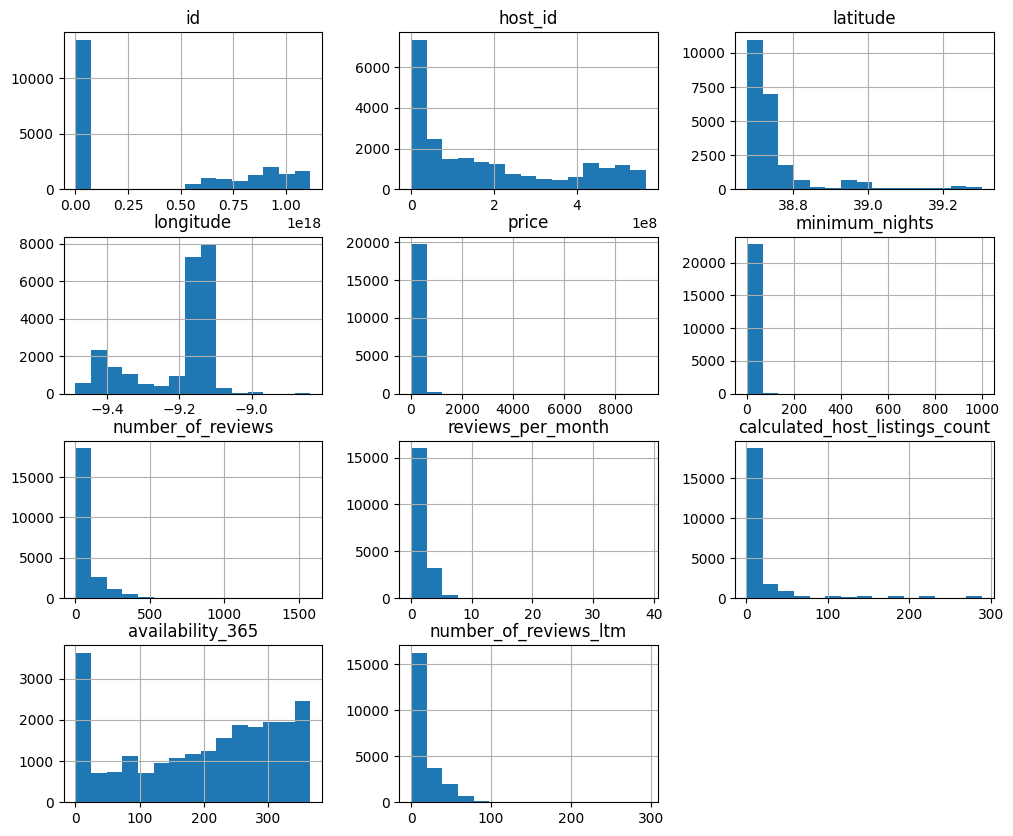

In [ ]:
# plotar o histograma das variáveis numéricas

df.hist(bins = 15, figsize=(12,10));

### **Q4. Qual a média dos preços de aluguel?**
De forma simples poderíamos ver mais informações estatísticas de um tipo de variável númerica usando o método `describe()`, mas como queremos somente a *média*, usaremos o método `mean()`. e assim vemos que nossa média de preços é de `127.30795346747216`

In [ ]:
# ver a média da coluna `price``
df['price'].mean()

127.30795346747216

### **Q4. Qual a correlação existente entre as variáveis**
Correlação significa que existe uma relação entre duas coisas, aqui usaremos para saber se há essa correlação entre uma variável e outra, e o quanto uma interfere sobre a outra. Para isso utilizaremos duas técnicas bastante utilizadas em análise de dados: a **Matriz de correlação**. E também irei gerar um *heatmap* com base nessa matriz usando a biblioteca `seaborn`.
(Importante ressaltar que a Matriz Correlação funciona apenas para variáveis ou atributos numéricos, e aqui usarei somente as que tem números relevantes para a nossa matriz, excluindo alguns como: *id*, *host_id*, *latitude* e etc.)

In [ ]:
# criar uma matriz de correlação
corelacao = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
                'calculated_host_listings_count', 'availability_365']].corr()
# mostrar a matriz de correlação
display(corelacao)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.028012,-0.068750,-0.112149,-0.004853,0.042511
minimum_nights,0.028012,1.000000,-0.059632,-0.066977,0.082025,-0.014864
number_of_reviews,-0.068750,-0.059632,1.000000,0.626294,-0.116193,-0.012877
reviews_per_month,-0.112149,-0.066977,0.626294,1.000000,-0.076653,0.029102
calculated_host_listings_count,-0.004853,0.082025,-0.116193,-0.076653,1.000000,0.029690
availability_365,0.042511,-0.014864,-0.012877,0.029102,0.029690,1.000000


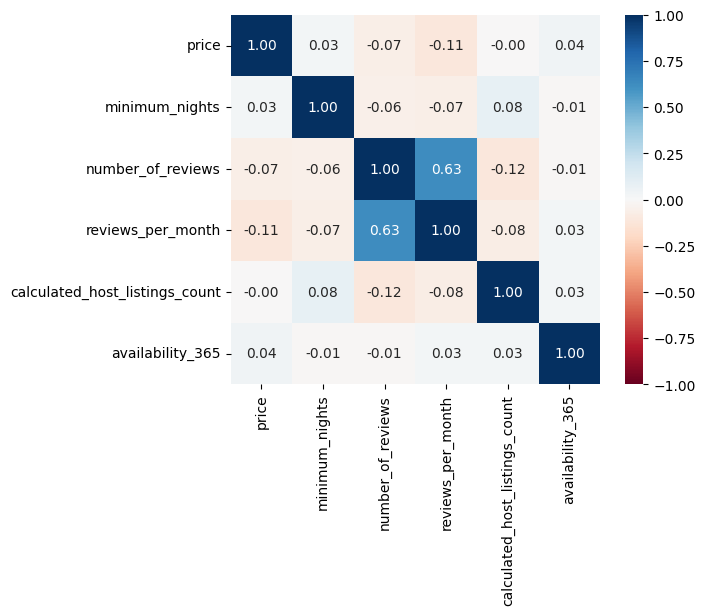

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corelacao, cmap='RdBu',center=0, vmin=-1, vmax=1, fmt='.2f', square=True, linecolor='black', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**
A coluna de nome `room_type`nos mostra qual o tipo da locação que está sendo anunciado no Airbnb. Se você já fez uma busca pelo site, sabe que existe uma grade variedade de espaços inteiros, quartos privativos, quartos de hotel e quartos compartilhados que podem ser alugadas pelo site.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

Vemos que:
* 74% são do tipo *Espaços inteiros*.(`Entire home/apt`)
* 23,8% são do tipo *Quartos privativos*.(`Private room`)
* E a pequena parte que sobrou é a de *Quartos compartilhados* e *Quartos de hotel.*

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df.room_type.value_counts()

room_type
Entire home/apt    16968
Private room        5480
Shared room          284
Hotel room           197
Name: count, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df.room_type.value_counts() / df.shape[0] *100

room_type
Entire home/apt    74.002355
Private room       23.899865
Shared room         1.238606
Hotel room          0.859174
Name: count, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**
Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.



In [ ]:
#aqui procuro saber qual a quantidade que cada bairro aparece no nosso dataframe
df.neighbourhood.value_counts()

neighbourhood
Santa Maria Maior      3260
Misericrdia            2404
Arroios                2067
Cascais e Estoril      1467
Santo Antnio           1369
                       ... 
Painho e Figueiros        1
Meca                      1
Vila Nova da Rainha       1
Fanhes                    1
Aveiras de Cima           1
Name: count, Length: 129, dtype: int64

In [ ]:
# ver preços por bairros, na média
df.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:12]

neighbourhood
Alguber                            780.000000
Vialonga                           593.666667
Aveiras de Baixo                   305.500000
Alenquer (Santo Estvo e Triana)    305.000000
Vermelha                           252.500000
Alcabideche                        240.354430
Reguengo Grande                    240.133333
Carvoeira e Carmes                 236.333333
Colares                            226.951613
Ribamar                            226.642857
Santa Brbara                       223.076923
Camarate, Unhos e Apelao           222.133333
Name: price, dtype: float64

Os bairros do Chiado, Santo António, Misericórdia e Estrela são “os mais caros” de Lisboa, segundo dados de 2020 da imobiliária Engel & Völkers.

 Mas não vejo esses bairros na nossa lista, vemos logo acima que essa média pode estar alterada pela quantidade que ela aparece no nosso dataframe. Só para dar um único exemplo de como uma amostra pode ser não-representativa, veja quantas entradas há para o Alguber(que é o primeiro na nossa lista de valores).

In [ ]:
#ver quatidade de imóveis no Alguber
print(df[df.neighbourhood == "Alguber"].shape)
# ver as 3 entradas do Alguber
df[df.neighbourhood == "Alguber"]

(1, 18)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
21450,50695709,Qta do Porto Nogueira | Romana Vini - Adults Only,409658585,Pedro,Cadaval,Alguber,39.27377,-9.0203,Entire home/apt,780.0,1,1,2021-08-10,0.03,1,327,0,5780


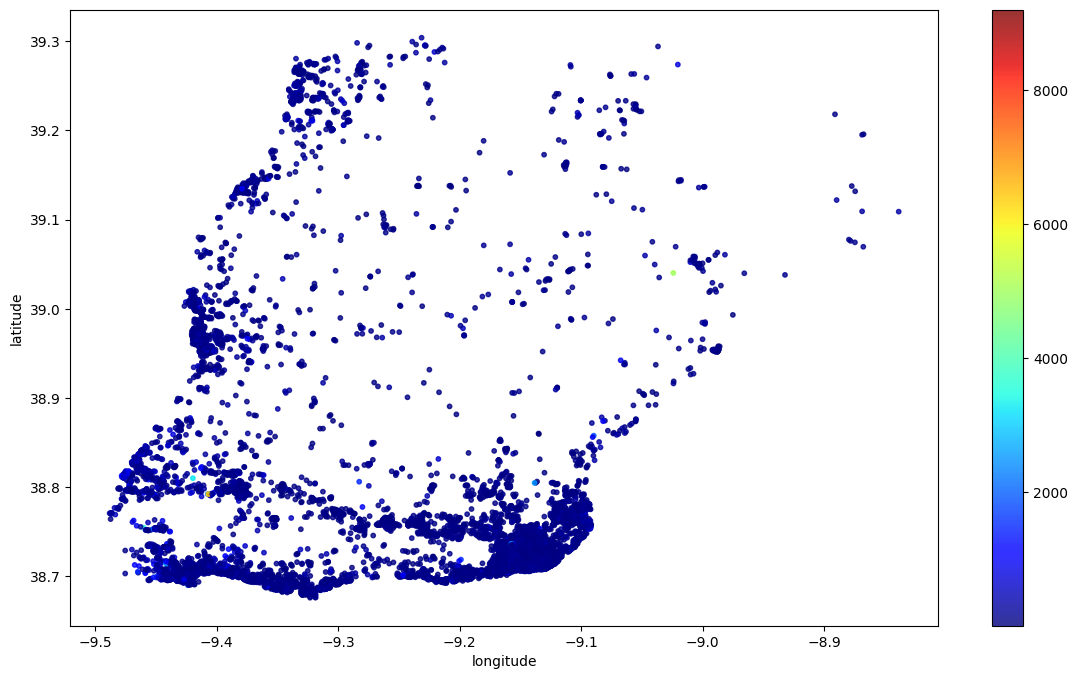

In [ ]:
# plotar os imóveis pela latitude-longitude
df.plot(kind='scatter',x='longitude',y='latitude',alpha= 0.8, c=df['price'],s=10,
              cmap=plt.get_cmap('jet'), figsize=(14,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**
Aqui na coluna `minimum_nights` usaremos o mesmo método que usamos com a coluna `price` o método`mean()`, para checarmos como é a média dessa coluna

In [ ]:
# ver a média da coluna `minimum_nights``
df.minimum_nights.mean()

4.608792359021327

## Conclusões


Chegando ao fim dessa minha primeira análise de dados, uma análise bem introdutória para fixar o conteúdo presente no módulo de análise exploratória de dados.

Indo para o Dados em si, com essa análise podemos verificar que alguns dados podem ser afetados por outliers, como na variável `minimum_nights⁣`, por exemplo, onde o máximo de noites pode chegar a mil.

Podemos ver que também algumas análises estatísticas podem ser distorcidas devido à quantidade de imoveis disponíveis, como, por exemplo, a média de preço de imoveis a partir do preço de locação.

Finalizando, este é uma versão do dataset resumido, recomendada apenas para uma, analise superficial feita por alguém que ainda não tem tanto conhecimento em ciência de dados como eu haha, para uma análise mais profunda recomendamos o outro dataset disponível no mesmo site. Enfim é isso e até a próxima.